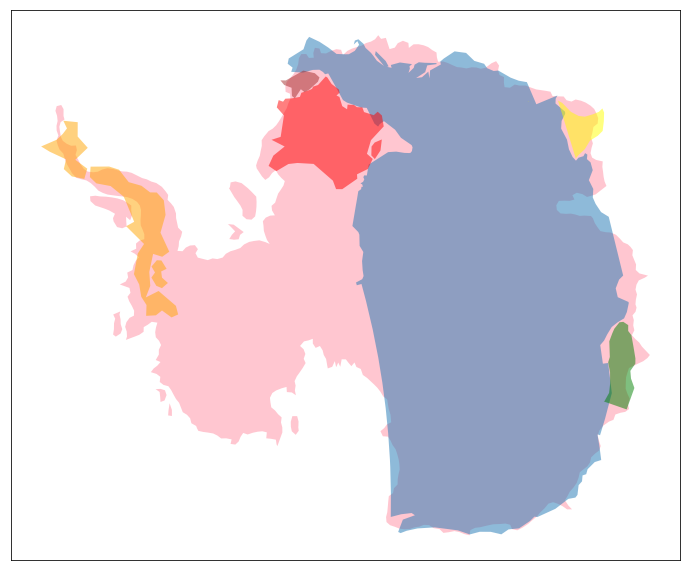

In [43]:
import os
import pandas
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import shapely

def albersconic(gdf, lat0, lat1, lat2, lon0):
    lat0 = str(lat0)
    lat1 = str(lat1)
    lat2 = str(lat2)
    lon0 = str(lon0)
    gdf.crs = {'init' :'epsg:4326'}
    crs_string = '+proj=aea +lat_1='+lat1+' +lat_2='+lat2+' +lat_0='+lat0+' +lon_0='+lon0+' +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
    gdf = gdf.to_crs(crs_string)

    return gdf

def moveit(gdf, angle = 0, xoffset = 0, yoffset = 0):
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.rotate(x, angle))
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=xoffset, yoff=yoffset))
    
    return gdf

def makeboxfilter(gdf, left, right, top, bottom):
    swcorner = (left, bottom)
    nwcorner = (left, top)
    necorner = (right, top)
    secorner = (right, bottom)
    pointlist = [swcorner, nwcorner, necorner, secorner, swcorner]
    pgon = shapely.geometry.Polygon([[p[0], p[1]] for p in pointlist])
    bbox = pgon.envelope
    bbdf = gpd.GeoDataFrame(gpd.GeoSeries(bbox), columns=['geometry'])
    bbdf = bbdf.set_geometry('geometry')
    
    return bbdf

datadir = '/home/idies/workspace/raddick_census/pop2016'
os.chdir(datadir)

statedir = '/home/idies/workspace/raddick_census/geography/STATE/'
statefile = statedir + 'tl_2016_us_state.shp'
states_geo = gpd.read_file(statefile)
warnings.filterwarnings("ignore")
#import matplotlib.patches as mpatches

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('iso_a3')

antarctica = world[world['name'] == 'Antarctica']
usa = world[world.index == 'USA']
tx = world[world.index == 'USA']
fl = world[world.index == 'USA']

antarctica = albersconic(antarctica, lat0=-90, lat1=-82, lat2=-82, lon0=0.001)
#antarctica = antarctica.to_crs('+proj=aea +lat_1=-82 +lat_2=-82 +lat_0=-90 +lon_0=0.001 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')


bbdf = makeboxfilter(usa, left=-130, right=-60, top=50, bottom=29)
usa = gpd.overlay(usa, bbdf, how='intersection')

flbbdf = makeboxfilter(fl, left=-83.5, right=-79, top=31.5, bottom=25)
usa = gpd.overlay(usa, flbbdf, how='difference')
fl = gpd.overlay(fl, flbbdf, how='intersection')

txbbdf = makeboxfilter(fl, left=-105, right=-92, top=29, bottom=25)
usa = gpd.overlay(usa, txbbdf, how='difference')
tx = gpd.overlay(tx, txbbdf, how='intersection')


jp = world[world.index == 'JPN']

fr = world[world.index == 'FRA']
corsica = world[world.index == 'FRA']

frbbdf = makeboxfilter(fr, left=-6, right=8, top=52, bottom=42)
fr = gpd.overlay(fr, frbbdf, how='intersection')

corbbdf = makeboxfilter(corsica, left=8, right=13, top=45, bottom=40)
corsica = gpd.overlay(corsica, corbbdf, how='intersection')

nl = world[world.index == 'NLD']
nl = gpd.overlay(nl, nlbbdf, how='intersection')

usa = albersconic(usa, lat0=37.5, lat1=29.5, lat2=45.5, lon0=-96)
fl = albersconic(fl, lat0=30, lat1=29, lat2=31, lon0=-84)
tx = albersconic(tx, lat0=27.5, lat1=26.5, lat2=28.5, lon0=-96)
jp = albersconic(jp, lat0=37, lat1=32, lat2=42, lon0=137)
fr = albersconic(fr, lat0=47, lat1=44, lat2=50, lon0=3)
corsica = albersconic(corsica, lat0=47, lat1=44, lat2=50, lon0=3)
nl = albersconic(nl, lat0=52.5, lat1=51, lat2=54, lon0=5)

usa = moveit(usa, angle=105, xoffset=1175000, yoffset=-165000)
fl = moveit(fl, angle=160, xoffset=2200000, yoffset=-520000)
tx = moveit(tx, angle=108, xoffset=2300000, yoffset=1400000)
jp = moveit(jp, angle=71, xoffset=-2000000, yoffset=400000)
fr = moveit(fr, angle=56, xoffset=-100000, yoffset=1300000)
corsica = moveit(corsica, angle=-20, xoffset=-220000, yoffset=1690000)
nl = moveit(nl, angle=-40, xoffset=-400000, yoffset=1790000)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

plt.tick_params(axis='both', which='both', left='off', bottom='off', labelleft='off', labelbottom='off') # labels along the bottom edge are off
antarctica.plot(ax=ax, alpha=0.9, color='pink')
usa.plot(ax=ax, alpha=0.5)
fl.plot(ax=ax, alpha=0.5, color='green')
tx.plot(ax=ax, alpha=0.5, color='yellow')
jp.plot(ax=ax, alpha=0.5, color='orange')
fr.plot(ax=ax, alpha=0.5, color='red')
corsica.plot(ax=ax, alpha=0.5, color='red')
nl.plot(ax=ax, alpha=0.5, color='brown')

plt.show()